In [1]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import prepare

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

In [12]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

#### Load Sales_Items_Stores data

In [2]:
# using store_items_sales df which is my merged csv
df = prepare.stores_convert_datetime()

In [3]:
df.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,2013-01-01,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,11.0,2013-01-02,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,14.0,2013-01-03,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,2013-01-04,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,10.0,2013-01-05,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [5]:
merged = prepare.set_datetime_index(df, 'sale_date')

In [6]:
merged.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,17,26.0,295813,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,7,32.0,125995,10,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,18,45.0,314073,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,19,34.0,332333,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


In [7]:
merged = prepare.add_sales_total(merged)

In [8]:
merged.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,15.476190
2013-01-01,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,17,26.0,295813,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,22.413793
2013-01-01,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,7,32.0,125995,10,8503 NW Military Hwy,San Antonio,10,TX,78231,3.319502
2013-01-01,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,18,45.0,314073,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,10.250569
2013-01-01,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,19,34.0,332333,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,45.945946


In [14]:
merged = merged.index.astype('date')

dtype('O')

1) Split data (train/validate/test) and resample by any period, except daily, and aggregate using the sum.

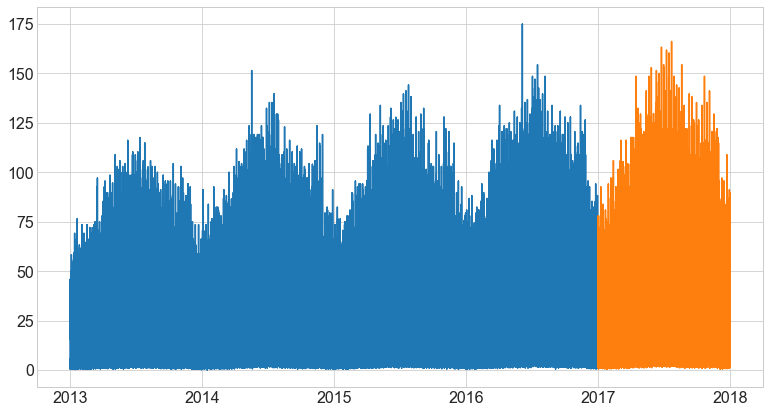

In [13]:
# Human split data
train = merged[:'2016'] # includes 2016
test = merged['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [14]:
# resample by month
train.resample('M').agg(sum)

,item_id,item_price,item_upc12,item_upc14,item,sale_amount,sale_id,store,store_id,store_zipcode,sales_total
sale_date,,,,,,,,,,,
2013-01-31,395250,79986.2,3696266159611120,3696266159611120,395250,454904.0,7061846500,85250,85250,1212484400,137827.325902
2013-02-28,357000,72245.6,3338562982874560,3338562982874560,357000,459417.0,6378855000,77000,77000,1095147200,139049.208221
2013-03-31,395250,79986.2,3696266159611120,3696266159611120,395250,617382.0,7062761000,85250,85250,1212484400,186595.118651
2013-04-30,382500,77406.0,3577031767365600,3577031767365600,382500,682274.0,6835387500,82500,82500,1173372000,206431.192464
2013-05-31,395250,79986.2,3696266159611120,3696266159611120,395250,763242.0,7063706500,85250,85250,1212484400,231277.447129
2013-06-30,382500,77406.0,3577031767365600,3577031767365600,382500,795597.0,6836302500,82500,82500,1173372000,240396.042051
2013-07-31,395250,79986.2,3696266159611120,3696266159611120,395250,855922.0,7064652000,85250,85250,1212484400,259331.415329
2013-08-31,395250,79986.2,3696266159611120,3696266159611120,395250,766761.0,7065132500,85250,85250,1212484400,231988.279603
2013-09-30,382500,77406.0,3577031767365600,3577031767365600,382500,689907.0,6837682500,82500,82500,1173372000,208829.422204
